# Examine Uncertainty Performance Results for all Combinations (e.g. Rankings)

<hr/>

#### Imports

In [1]:
import collections

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Constants

In [2]:
DATA_FOLDER = '../../../data/generated_by_notebooks/'
PLOT_FOLDER = './plots/'

#### Settings

In [3]:
mpl.rcParams['figure.dpi'] = 200

algorithms = ['rf', 'xgb', 'svm_rbf', 'shallow', 'dropout']
# Before
#algorithm_names = ['RF', 'XGB', 'SVM', 'Shallow', 'Deep']
# After implementing remarks:
algorithm_names = ['RF', 'XGB', 'SVM', 'SNN', 'DNN']
algorithm_to_name = dict(zip(algorithms, algorithm_names))

descriptors = ['maccs', 'ecfc', 'rdkit', 'cddd']
descriptor_names = ['MACCS', 'MFC', 'RDKit', 'CDDD']
descriptor_to_name = dict(zip(descriptors, descriptor_names))

# Names of the datasets that were already run
dataset_names = [
    'tetrahymena',
    'freesolv',
    'esol',
    'MMP2',
    'IL4',
    'F7',
    'O60674',
    'O14965',
    'P03372',
    'P04150',
    'P06401',
    'P11229',
    'P12931',
    'P16581',
    'P17252',
    'P18089',
    'P19327',
    'P21554',
    'P24530',
    'P25929',
    'P28335',
    'P28482',
    'P35968',
    'P41594',
    'P42345',
    'P47871',
    'P49146',
    'P61169',
    'Q05397',
    'Q16602',
    'P24941',
    'Q92731'
]

#### Functions

In [4]:
def load_evaluation_matrix(name, evaluation='predictive', to_matrix=True):
    """Loads performance table for a single dataset."""
    path = f'{DATA_FOLDER}/{evaluation}_performances/{name}.csv'
    df = pd.read_csv(path, sep=';').set_index('descriptor')
    if to_matrix:
        matrix = df.to_numpy()
        return matrix
    else:
        return df
    
    
def find_all_below_or_above(tables, threshold, above=True, explicit=False):
    """Finds and reports all combinations above or below a given threshold."""
    def hit(value):
        if above:
            return value >= threshold
        else:
            return value <= threshold
    external_hit_counter = 0
    maximum_hit_counter = 0
    max_hits = len(descriptor_names) * len(algorithm_names)
    print('ANY | ALL | DESCRIPTION')
    print('---------------------------')
    for name in dataset_names:
        internal_hit_counter = 0
        exceptions = list()
        for i, descriptor in enumerate(descriptor_names):
            for j, algorithm in enumerate(algorithm_names):
                val = tables[name][i][j]
                if hit(val):
                    if explicit:
                        print(f'{dataset_name} {descriptor} {algorithm}: {val}')
                    internal_hit_counter += 1
                else:
                    exceptions.append(f'{descriptor}, {algorithm}')
        if internal_hit_counter > 0:
            indicator = ' X  | '
            external_hit_counter += 1
        else:
            indicator = '    | '
        if internal_hit_counter == max_hits:
            indicator += ' X  |'
            maximum_hit_counter += 1
        else:
            indicator += '    |'
        if internal_hit_counter == max_hits - 1:
            print(f'{indicator} {name}: {internal_hit_counter}, exception: {exceptions[0]}')
        else:
            print(f'{indicator} {name}: {internal_hit_counter}')
        if explicit:
            print()
    print()
    print(f'{external_hit_counter} for any.')
    print(f'{maximum_hit_counter} for all.')
    

# Copied from
# https://matplotlib.org/3.5.0/gallery/images_contours_and_fields/image_annotated_heatmap.html
# then changed.

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_xticklabels(col_labels, size=7)
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_yticklabels(row_labels, size=7)

    # Let the horizontal axes labeling appear on top.
    #ax.tick_params(top=False, bottom=False, left=False,
    #               labeltop=True, labelbottom=False)
    ax.tick_params(top=False, bottom=False, left=False,
                   labeltop=True, labelbottom=False)
    ax.tick_params(axis="y", pad=-2.)
    ax.tick_params(axis="x", pad=-3.)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="default")
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
            rotation_mode='anchor')

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]), minor=True)
    ax.set_yticks(np.arange(data.shape[0]), minor=True)

    #return im, cbar
    return im


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, inverse=False, underlining=False, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)
        
    # Added: Underline best performing value
    best_i, best_j = np.where(data==data.max())
    best_i, best_j = best_i[0], best_j[0]
    mykwargs = {'size': 9, 'ha': 'center', 'va': 'center'}

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            # Original:
            #kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            # Changed:
            string = valfmt(data[i, j], None)
            if inverse:
                col = textcolors[int(im.norm(data[i, j]) > threshold)]
            else:
                col = textcolors[int(im.norm(data[i, j]) < threshold)]
            if i == best_i and j == best_j and underlining:
                text = im.axes.text(j, i, string, weight='bold', color=col, **mykwargs)
                underline = ''.join(['_' for char in range(len(string))])
                line = im.axes.text(j, i, underline, weight='bold', color=col, **mykwargs)
                texts.append(text)
                texts.append(line)
            else:
                text = im.axes.text(j, i, string, color=col, **mykwargs)
                texts.append(text)
            #kw.update(color=textcolors[int(im.norm(data[i, j]) < threshold)])
    return texts

<hr/>

#### Load data

In [5]:
performances = dict()

for dataset_name in dataset_names:
    df = load_evaluation_matrix(dataset_name, evaluation='uncertainty')
    performances[dataset_name] = df

<hr/>

### Evaluate

#### Inspect distribution

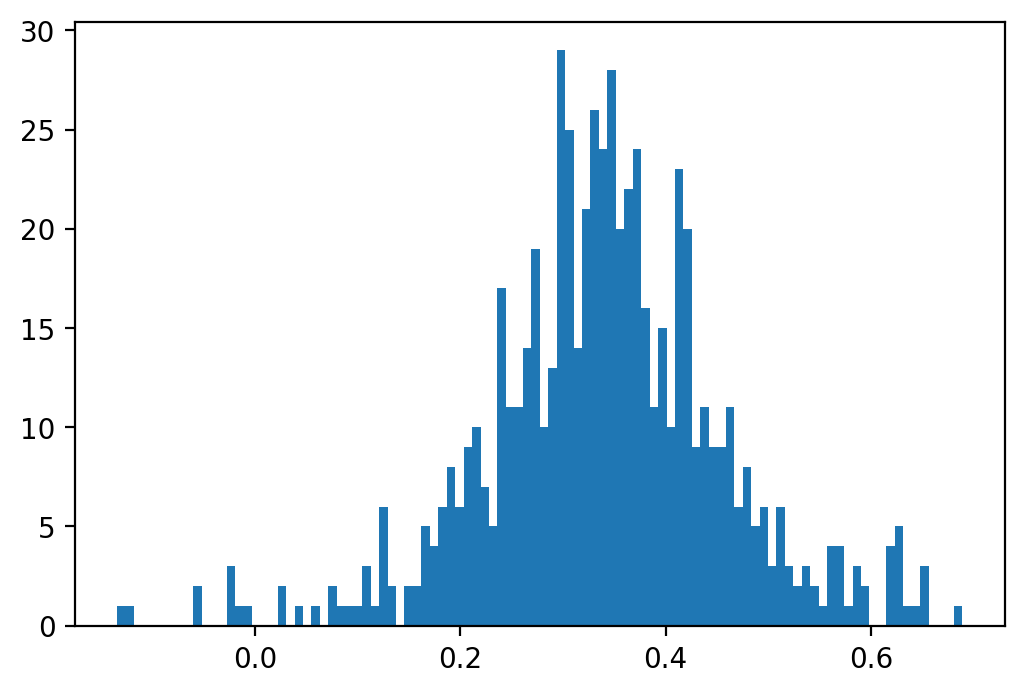

In [6]:
all_values_unraveled = list()

for dataset_name in dataset_names:
    for value in performances[dataset_name].reshape(-1):
        all_values_unraveled.append(value)

plt.hist(all_values_unraveled, bins=100)
plt.show()

In [7]:
med = np.median(all_values_unraveled)
print(med)

0.3396102217633631


#### $\rho$ above/below given threshold

In [8]:
find_all_below_or_above(performances, med)

ANY | ALL | DESCRIPTION
---------------------------
 X  |     | tetrahymena: 18
 X  |     | freesolv: 18
 X  |     | esol: 12
 X  |     | MMP2: 7
 X  |     | IL4: 1
 X  |     | F7: 3
 X  |     | O60674: 1
 X  |     | O14965: 17
 X  |     | P03372: 11
 X  |     | P04150: 6
 X  |     | P06401: 15
 X  |     | P11229: 18
 X  |     | P12931: 7
    |     | P16581: 0
 X  |     | P17252: 16
 X  |     | P18089: 3
 X  |     | P19327: 12
 X  |     | P21554: 10
 X  |     | P24530: 3
 X  |     | P25929: 19, exception: RDKit, SNN
 X  |     | P28335: 10
 X  |  X  | P28482: 20
 X  |     | P35968: 2
 X  |     | P41594: 15
 X  |     | P42345: 15
 X  |     | P47871: 6
 X  |     | P49146: 12
 X  |     | P61169: 17
 X  |     | Q05397: 7
 X  |     | Q16602: 1
 X  |     | P24941: 14
 X  |     | Q92731: 4

31 for any.
1 for all.


In [9]:
find_all_below_or_above(performances, med, above=False)

ANY | ALL | DESCRIPTION
---------------------------
 X  |     | tetrahymena: 2
 X  |     | freesolv: 2
 X  |     | esol: 8
 X  |     | MMP2: 13
 X  |     | IL4: 19, exception: RDKit, SNN
 X  |     | F7: 17
 X  |     | O60674: 19, exception: MACCS, XGB
 X  |     | O14965: 3
 X  |     | P03372: 9
 X  |     | P04150: 14
 X  |     | P06401: 5
 X  |     | P11229: 2
 X  |     | P12931: 13
 X  |  X  | P16581: 20
 X  |     | P17252: 4
 X  |     | P18089: 17
 X  |     | P19327: 8
 X  |     | P21554: 10
 X  |     | P24530: 17
 X  |     | P25929: 1
 X  |     | P28335: 10
    |     | P28482: 0
 X  |     | P35968: 18
 X  |     | P41594: 5
 X  |     | P42345: 5
 X  |     | P47871: 14
 X  |     | P49146: 8
 X  |     | P61169: 3
 X  |     | Q05397: 13
 X  |     | Q16602: 19, exception: MFC, RF
 X  |     | P24941: 6
 X  |     | Q92731: 16

31 for any.
1 for all.


#### Homogeneity between $\rho$ values

In [10]:
diffs = list()

for dataset_name in dataset_names:
    matrix = performances[dataset_name]
    diff = matrix.max() - matrix.min()
    diffs.append(f'{diff} {dataset_name}:          {matrix.min()}, {matrix.max()}')
    
for diff in list(sorted(diffs)):
    print(diff)

0.148322006804881 P11229:          0.331181130974562, 0.479503137779443
0.16097726949257807 P04150:          0.2098899787286223, 0.3708672482212004
0.1690583235685859 P28335:          0.2518068008018214, 0.4208651243704073
0.17208209318272283 P24530:          0.2122932422142101, 0.3843753353969329
0.17309873776130238 O60674:          0.1695801516178587, 0.3426788893791611
0.1851041771081836 P42345:          0.2591488876441803, 0.4442530647523639
0.1890147693363159 P06401:          0.243887513642568, 0.4329022829788839
0.20799311368520518 P35968:          0.1630255245970778, 0.371018638282283
0.2112963590311181 P21554:          0.2013322073100216, 0.4126285663411397
0.21204980179839142 IL4:          0.1562567623106619, 0.3683065641090533
0.2152342589290038 P03372:          0.2047418225787239, 0.4199760815077277
0.217649949143343 O14965:          0.2221691747462466, 0.4398191238895896
0.22354598801793388 P47871:          0.1847271651191227, 0.4082731531370566
0.2257102863541833 Q92731:  

#### Best combinations

In [11]:
best_combinations = list()

for dataset_name in dataset_names:
    matrix = performances[dataset_name]
    i_, j_ = np.where(matrix==matrix.max())
    i, j = i_[0], j_[0]
    best_combinations.append(f'{descriptor_names[i]}, {algorithm_names[j]}')
    print(f'{dataset_name}: {descriptor_names[i]}, {algorithm_names[j]}')

tetrahymena: RDKit, XGB
freesolv: RDKit, SVM
esol: RDKit, SNN
MMP2: RDKit, SNN
IL4: RDKit, SNN
F7: CDDD, SNN
O60674: MACCS, XGB
O14965: MFC, RF
P03372: CDDD, XGB
P04150: MFC, RF
P06401: CDDD, RF
P11229: RDKit, XGB
P12931: MFC, DNN
P16581: MACCS, RF
P17252: RDKit, XGB
P18089: MFC, RF
P19327: CDDD, XGB
P21554: MACCS, DNN
P24530: CDDD, XGB
P25929: CDDD, RF
P28335: MFC, SVM
P28482: MACCS, XGB
P35968: MFC, DNN
P41594: MFC, DNN
P42345: RDKit, XGB
P47871: MFC, RF
P49146: CDDD, RF
P61169: CDDD, SVM
Q05397: RDKit, RF
Q16602: MFC, RF
P24941: MACCS, DNN
Q92731: RDKit, XGB


In [12]:
collections.Counter(best_combinations)

Counter({'RDKit, XGB': 5,
         'RDKit, SVM': 1,
         'RDKit, SNN': 3,
         'CDDD, SNN': 1,
         'MACCS, XGB': 2,
         'MFC, RF': 5,
         'CDDD, XGB': 3,
         'CDDD, RF': 3,
         'MFC, DNN': 3,
         'MACCS, RF': 1,
         'MACCS, DNN': 2,
         'MFC, SVM': 1,
         'CDDD, SVM': 1,
         'RDKit, RF': 1})

#### Worst combinations

In [13]:
worst_combinations = list()

for dataset_name in dataset_names:
    matrix = performances[dataset_name]
    i_, j_ = np.where(matrix==matrix.min())
    i, j = i_[0], j_[0]
    worst_combinations.append(f'{descriptor_names[i]}, {algorithm_names[j]}')
    print(f'{dataset_name}: {descriptor_names[i]}, {algorithm_names[j]}')

tetrahymena: MACCS, SNN
freesolv: MFC, SNN
esol: MFC, SNN
MMP2: MACCS, DNN
IL4: MACCS, SVM
F7: MFC, SNN
O60674: CDDD, SVM
O14965: MACCS, SVM
P03372: MACCS, SVM
P04150: MACCS, SNN
P06401: MACCS, SNN
P11229: RDKit, SNN
P12931: MACCS, SNN
P16581: MACCS, SVM
P17252: CDDD, SNN
P18089: MFC, DNN
P19327: MACCS, SNN
P21554: MACCS, SVM
P24530: CDDD, SNN
P25929: RDKit, SNN
P28335: MACCS, SNN
P28482: MACCS, SNN
P35968: MACCS, SNN
P41594: RDKit, SNN
P42345: MACCS, SVM
P47871: CDDD, SNN
P49146: MFC, SNN
P61169: MACCS, SNN
Q05397: CDDD, SNN
Q16602: MACCS, SVM
P24941: MFC, SVM
Q92731: MFC, SVM


In [14]:
collections.Counter(worst_combinations)

Counter({'MACCS, SNN': 9,
         'MFC, SNN': 4,
         'MACCS, DNN': 1,
         'MACCS, SVM': 7,
         'CDDD, SVM': 1,
         'RDKit, SNN': 3,
         'CDDD, SNN': 4,
         'MFC, DNN': 1,
         'MFC, SVM': 2})

#### Find globally lowest/highest

In [15]:
lowest = 1.0
arg_lowest = ''
highest = -1.0
arg_highest = ''

for dataset_name in dataset_names:
    matrix = performances[dataset_name]
    current_lowest = matrix.min()
    current_highest = matrix.max()
    if current_lowest < lowest:
        lowest = current_lowest
        i_, j_ = np.where(matrix==lowest)
        i, j = i_[0], j_[0]
        arg_lowest = f'{dataset_name}, {descriptor_names[i]} & {algorithm_names[j]}'
    if current_highest > highest:
        highest = current_highest
        i_, j_ = np.where(matrix==highest)
        i, j = i_[0], j_[0]
        arg_highest = f'{dataset_name}, {descriptor_names[i]} & {algorithm_names[j]}'

In [16]:
print(f'Globally lowest:  {arg_lowest}  {lowest}')
print(f'Globally highest: {arg_highest}  {highest}')

Globally lowest:  P16581, MACCS & SVM  -0.1346535416385737
Globally highest: P28482, MACCS & XGB  0.6891875935985722


#### Picking out points of interest

In [17]:
data_set_of_interest = 'P11229'

min_val = performances[data_set_of_interest].min()
i_, j_ = np.where(performances[data_set_of_interest]==min_val)
i, j = i_[0], j_[0]
print(f'Smallest val for {data_set_of_interest} ({min_val}) with {descriptor_names[i]} & {algorithm_names[j]}')

max_val = performances[data_set_of_interest].max()
i_, j_ = np.where(performances[data_set_of_interest]==max_val)
i, j = i_[0], j_[0]
print(f'Largest val for {data_set_of_interest} ({max_val}) with {descriptor_names[i]} & {algorithm_names[j]}')

Smallest val for P11229 (0.331181130974562) with RDKit & SNN
Largest val for P11229 (0.479503137779443) with RDKit & XGB


In [18]:
data_set_of_interest = 'P11229'

min_val = performances[data_set_of_interest].min()
i_, j_ = np.where(performances[data_set_of_interest]==min_val)
i, j = i_[0], j_[0]
print(f'Smallest val for {data_set_of_interest} ({min_val}) with {descriptor_names[i]} & {algorithm_names[j]}')

max_val = performances[data_set_of_interest].max()
i_, j_ = np.where(performances[data_set_of_interest]==max_val)
i, j = i_[0], j_[0]
print(f'Largest val for {data_set_of_interest} ({max_val}) with {descriptor_names[i]} & {algorithm_names[j]}')

Smallest val for P11229 (0.331181130974562) with RDKit & SNN
Largest val for P11229 (0.479503137779443) with RDKit & XGB


### "Success tables"

In [19]:
success_table = pd.DataFrame(np.zeros((len(descriptor_names), len(algorithm_names))), index=descriptor_names, columns=algorithm_names, dtype=int)
fail_table = pd.DataFrame(np.zeros((len(descriptor_names), len(algorithm_names))), index=descriptor_names, columns=algorithm_names, dtype=int)

best_dict = collections.Counter(best_combinations)
worst_dict = collections.Counter(worst_combinations)

for algorithm_name in algorithm_names:
    for descriptor_name in descriptor_names:
        lookup = f'{descriptor_name}, {algorithm_name}'
        success_table[algorithm_name][descriptor_name] = best_dict[lookup]
        fail_table[algorithm_name][descriptor_name] = worst_dict[lookup]

Plot and save

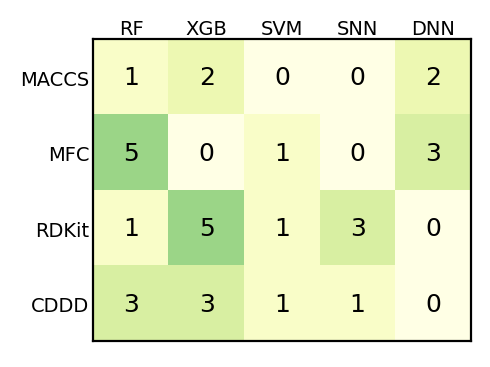

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2))
im = heatmap(success_table.to_numpy(), descriptor_names, algorithm_names, ax=ax, cmap='YlGn', cbarlabel=None)
texts = annotate_heatmap(im, valfmt="{x}", inverse=True, threshold=6)
im.set_clim(0, 12)
ax.set_title(None, size=7)
plt.savefig(PLOT_FOLDER+'summaries/rho_best.pdf', bbox_inches='tight', pad_inches=0.0)
plt.show()

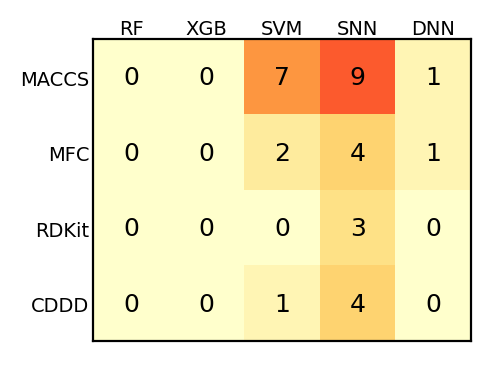

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2))
im = heatmap(fail_table.to_numpy(), descriptor_names, algorithm_names, ax=ax, cmap='YlOrRd', cbarlabel=None)
texts = annotate_heatmap(im, valfmt="{x}", threshold=0)
im.set_clim(0, 15)
ax.set_title(None, size=7)
plt.savefig(PLOT_FOLDER+'summaries/rho_worst.pdf', bbox_inches='tight', pad_inches=0.0)
plt.show()

### "Rank sum tables"

In [22]:
rank_sums = np.zeros((4, 5), dtype=int)

for dataset_name in dataset_names:
    order = performances[dataset_name].reshape((-1)).argsort()[::-1] 
    ranks = order.argsort() + 1
    rank_sums += ranks.reshape((4, 5))
    
rank_sums

array([[313, 224, 482, 576, 338],
       [222, 275, 362, 503, 293],
       [194, 181, 376, 443, 354],
       [199, 215, 340, 435, 395]])

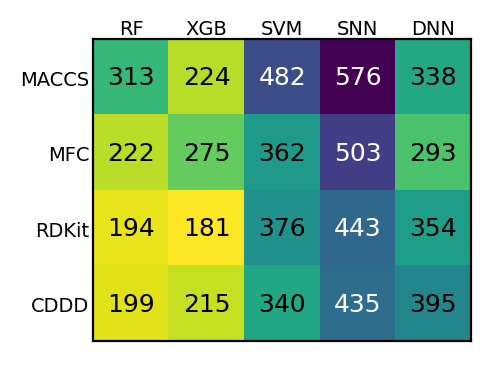

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2))
im = heatmap(rank_sums, descriptor_names, algorithm_names, ax=ax, cmap='viridis_r', cbarlabel=None)
texts = annotate_heatmap(im, valfmt="{x}", inverse=True, threshold=400)
plt.savefig(PLOT_FOLDER+'summaries/rho_rank_sums.pdf', bbox_inches='tight', pad_inches=0.0)
plt.show()

Combine both (pred and uq) heatmaps

In [24]:
# Collect

predictive_performances = dict()

for dataset_name in dataset_names:
    df = load_evaluation_matrix(dataset_name, evaluation='predictive')
    predictive_performances[dataset_name] = df
    

pred_rank_sums = np.zeros((4, 5), dtype=int)

for dataset_name in dataset_names:
    order = predictive_performances[dataset_name].reshape((-1)).argsort()[::-1] 
    ranks = order.argsort() + 1
    pred_rank_sums += ranks.reshape((4, 5))
    
pred_rank_sums

array([[429, 294, 628, 571, 382],
       [305, 150, 494, 296, 134],
       [359, 221, 488, 382, 177],
       [468, 323, 273, 232, 114]])

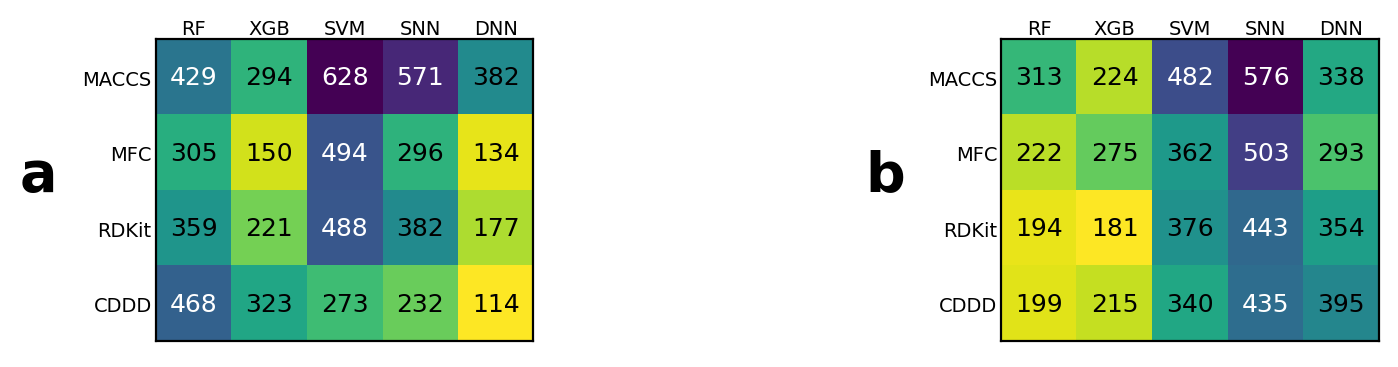

In [25]:
# Plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))

im = heatmap(pred_rank_sums, descriptor_names, algorithm_names, ax=ax1, cmap='viridis_r', cbarlabel=None)
texts = annotate_heatmap(im, valfmt="{x}", inverse=True, threshold=400)
ax1.text(-2.3, 1.5, 'a', fontsize=20, weight='bold', zorder=100000)

im = heatmap(rank_sums, descriptor_names, algorithm_names, ax=ax2, cmap='viridis_r', cbarlabel=None)
texts = annotate_heatmap(im, valfmt="{x}", inverse=True, threshold=400)
ax2.text(-2.3, 1.5, 'b', fontsize=20, weight='bold', zorder=100000)

plt.savefig(PLOT_FOLDER+'summaries/r2_and_rho_rank_sums.pdf', bbox_inches='tight', pad_inches=0.0)
plt.show()